<a href="https://colab.research.google.com/github/raphaelp-silva/deep_learning_com_pytorch_e_python/blob/main/Projeto_8_Regress%C3%A3o_carros_usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 8: Regressão carros usados

## Etapa 1: Importação das bibliotecas

In [112]:
import pandas as pd
import torch
import numpy as np
import seaborn as sns
from torch import nn, optim
import torch.nn.functional as F
torch.__version__

'2.5.1+cu124'

## Etapa 2: Base de dados

In [113]:
np.random.seed(123)
torch.manual_seed(123)

In [114]:
base = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [115]:
base.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [116]:
base.shape

(371528, 20)

In [117]:
# fazendo um tratamento inicial dos dados, retirando colunas desnecessarias
base = base.drop('dateCrawled', axis = 1)
base = base.drop('dateCreated', axis = 1)
base = base.drop('nrOfPictures', axis = 1)
base = base.drop('postalCode', axis = 1)
base = base.drop('lastSeen', axis = 1)

In [118]:
base.shape

(371528, 15)

In [119]:
base.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [120]:
base['name'].value_counts()

,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523
...,...
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON,1
Renault_clio_in_gold_450VB_!!,1
Fiat_Doblo_1.6_Multijet,1


In [121]:
base = base.drop('name', axis = 1)

In [122]:
base['seller'].value_counts()

,count
seller,
privat,371525
gewerblich,3


In [123]:
base = base.drop('seller', axis = 1)

In [124]:
base['offerType'].value_counts()

,count
offerType,
Angebot,371516
Gesuch,12


In [125]:
base = base.drop('offerType', axis = 1)

In [126]:
base.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [127]:
i1 = base.loc[base.price <= 10]

In [128]:
i1.shape

(12118, 12)

In [129]:
base = base[base.price > 10]

In [130]:
base.shape

(359410, 12)

In [131]:
i2 = base.loc[base.price > 350000]

In [132]:
i2.shape

(115, 12)

In [133]:
base = base.loc[base.price < 350000]

In [134]:
base.shape

(359291, 12)

<Axes: >

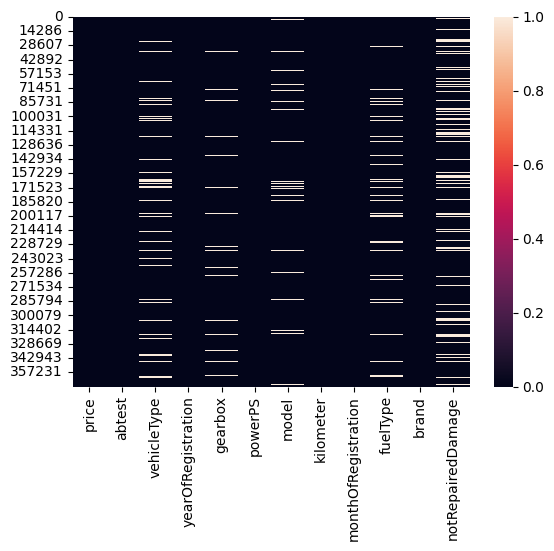

In [135]:
# visualizando colunas com valores nulos
sns.heatmap(base.isnull())

In [136]:
base.loc[pd.isnull(base['vehicleType'])] #localizando valores nulos da coluna 'vehicletype'

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [137]:
base['vehicleType'].value_counts()

,count
vehicleType,
limousine,93614
kleinwagen,78014
kombi,65921
bus,29699
cabrio,22509
coupe,18386
suv,14477
andere,3125


In [138]:
base.loc[pd.isnull(base['gearbox'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
15,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
32,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein
37,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein
70,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371443,3300,control,kombi,2006,NaN,0,touran,150000,7,diesel,volkswagen,NaN
371460,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN
371486,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN


In [139]:
base['gearbox'].value_counts() # manuell

,count
gearbox,
manuell,266547
automatik,75508


In [140]:
base.loc[pd.isnull(base['model'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
83,350,control,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja
139,1450,control,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein
156,6799,control,kleinwagen,2009,NaN,60,NaN,20000,5,benzin,volkswagen,nein
165,500,control,kleinwagen,1999,manuell,0,NaN,150000,0,benzin,renault,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371399,560,control,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja
371476,9400,control,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein


In [141]:
base['model'].value_counts() # golf

,count
model,
golf,28989
andere,25560
3er,19905
polo,12604
corsa,12149
...,...
serie_2,8
rangerover,6
serie_3,3


In [142]:
base.loc[pd.isnull(base['fuelType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
13,2500,control,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
36,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN
41,7500,control,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371496,3850,test,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [143]:
base['fuelType'].value_counts() # benzin

,count
fuelType,
benzin,217582
diesel,106002
lpg,5222
cng,557
hybrid,271
andere,165
elektro,101


In [144]:
base.loc[pd.isnull(base['notRepairedDamage'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
12,999,control,kombi,1995,manuell,115,passat,150000,11,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371507,5999,test,kombi,2005,manuell,140,a4,150000,4,diesel,audi,NaN
371514,999,control,cabrio,2000,manuell,95,megane,150000,4,benzin,renault,NaN
371515,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN


In [145]:
base['notRepairedDamage'].value_counts() # nein (não em alemão)

,count
notRepairedDamage,
nein,259301
ja,34004


In [146]:
# verificando se a coluna preço não possui valores nulos:
base.loc[pd.isnull(base['price'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [147]:
# preenchendo os valores nulos:
valores = {'vehicleType': 'limousine', 'gearbox': 'manuell',
           'model': 'golf', 'fuelType': 'benzin',
           'notRepairedDamage': 'nein'}
base = base.fillna(value = valores)

In [148]:
base.loc[pd.isnull(base['notRepairedDamage'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [149]:
previsores = base.iloc[:, 1:13].values
preco_real = base.iloc[:, 0].values

In [150]:
previsores.shape

(359291, 11)

In [151]:
from sklearn.preprocessing import OneHotEncoder #para transformar os valores categóricos em valores numéricos
from sklearn.compose import ColumnTransformer
# por exemplo:
# 0 0 0 -> palio
# 0 1 0 -> gol
# 0 0 1 -> uno

In [152]:
onehotencoder = ColumnTransformer(transformers = [("OneHot", OneHotEncoder(),
                                                   [0,1,3,5,8,9,10])], #passando as colunas que serão convertidas em valores numéricos
                                  remainder = 'passthrough') #esse atributo remainder garante que o algoritmo passará pelas demais colunas concatenando-as, caso seja esquecido, as demais colunas serão APAGADAS.
previsores = onehotencoder.fit_transform(previsores).toarray()

In [153]:
previsores.shape #observe que foram criadas novas colunas pois o OneHotEncoder cria novas colunas com valores numéricos (de 11 foi para 316)

(359291, 316)

In [154]:
previsores[0] #representacao do primeiro registro

array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [155]:
previsores = torch.tensor(previsores, dtype = torch.float)
preco_real = torch.tensor(preco_real, dtype = torch.float).view(-1, 1) #view é como um reshape

In [156]:
type(previsores)

torch.Tensor

In [157]:
preco_real.shape

torch.Size([359291, 1])

## Etapa 3: Construção do modelo de regressão

In [158]:
# 316 -> 158 -> 158 -> 1
# (entradas + saídas) / 2 = (316 + 1) / 2
regressor = nn.Sequential(nn.Linear(316, 158),
                          nn.ReLU(),
                          nn.Linear(158, 158),
                          nn.ReLU(),
                          nn.Linear(158, 1))

In [159]:
criterion = nn.L1Loss()

In [160]:
optimizer = optim.Adam(regressor.parameters())

In [161]:
dataset = torch.utils.data.TensorDataset(previsores, preco_real)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=300, shuffle=True)

## Etapa 4: Treinamento do modelo

In [162]:
# setando dispositivo para realizar o treinamento:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [163]:
regressor.to(device) #mandando o treinamento para o dispositivo setado acima

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [164]:
for epoch in range(100):
  running_loss = 0.
  running_mae = 0.

  for i, data in enumerate(train_loader):
    inputs, labels = data

    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = regressor.forward(inputs)

    mae = F.l1_loss(outputs, labels).item()

    running_mae += mae

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    print(f'\rÉpoca {epoch+1:3d} - Loop {i + 1:3d} de {len(preco_real)//300:3d}: perda {loss:06.2f} - MAE {mae:06.2f}')
  print(f'ÉPOCA {epoch+1:3d} finalizada: perda {running_loss/len(train_loader):0.5f} - MAE {running_mae/len(train_loader):0.5f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Época  96 - Loop 996 de 1197: perda 2087.43 - MAE 2087.43
Época  96 - Loop 997 de 1197: perda 2074.07 - MAE 2074.07
Época  96 - Loop 998 de 1197: perda 1852.90 - MAE 1852.90
Época  96 - Loop 999 de 1197: perda 2106.30 - MAE 2106.30
Época  96 - Loop 1000 de 1197: perda 2021.64 - MAE 2021.64
Época  96 - Loop 1001 de 1197: perda 2025.65 - MAE 2025.65
Época  96 - Loop 1002 de 1197: perda 2053.38 - MAE 2053.38
Época  96 - Loop 1003 de 1197: perda 2277.49 - MAE 2277.49
Época  96 - Loop 1004 de 1197: perda 2006.97 - MAE 2006.97
Época  96 - Loop 1005 de 1197: perda 2096.62 - MAE 2096.62
Época  96 - Loop 1006 de 1197: perda 2266.87 - MAE 2266.87
Época  96 - Loop 1007 de 1197: perda 2257.13 - MAE 2257.13
Época  96 - Loop 1008 de 1197: perda 2184.39 - MAE 2184.39
Época  96 - Loop 1009 de 1197: perda 2177.22 - MAE 2177.22
Época  96 - Loop 1010 de 1197: perda 2313.84 - MAE 2313.84
Época  96 - Loop 1011 de 1197: perda 2152.83 - MAE 2152.83
É

## Etapa 5: Avaliação do modelo

In [172]:
regressor.eval()

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [173]:
previsoes = regressor.forward(previsores.to(device))

In [174]:
previsoes

tensor([[  930.4525],
        [10996.9688],
        [12854.7637],
        ...,
        [ 6496.2456],
        [ 3506.7292],
        [27089.8145]], grad_fn=<AddmmBackward0>)

In [175]:
preco_real

tensor([[  480.],
        [18300.],
        [ 9800.],
        ...,
        [ 9200.],
        [ 3400.],
        [28990.]])

In [176]:
preco_real.mean()

tensor(5916.8335)

In [177]:
previsoes.mean()

tensor(5615.2959, grad_fn=<MeanBackward0>)

In [178]:
5916.9102 - 4942.3555

974.5547000000006